In [1]:
from tensorflow.examples.tutorials.mnist import input_data

import glob
import numpy as np

import matplotlib.pylab as plt

In [2]:
lambdas = [0.1,1,5,10,15,20,25,50,70,100] # ,250,500,1000,1500,2000
noise_factors = np.arange(0,1,0.1)

### Raw Input (MNIST with noise)

In [3]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)
x_train = mnist.train.images[:100]

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


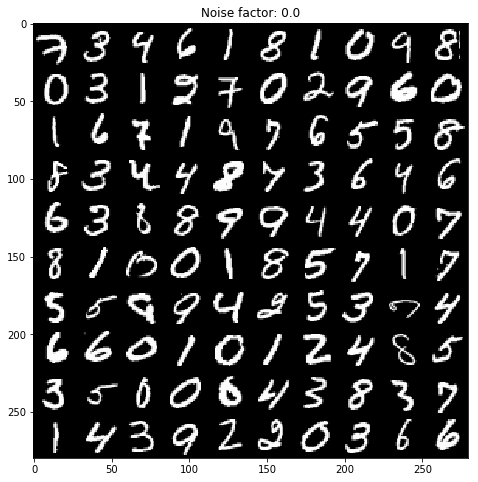

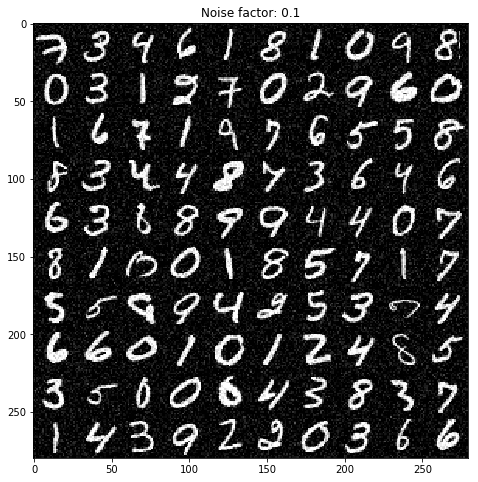

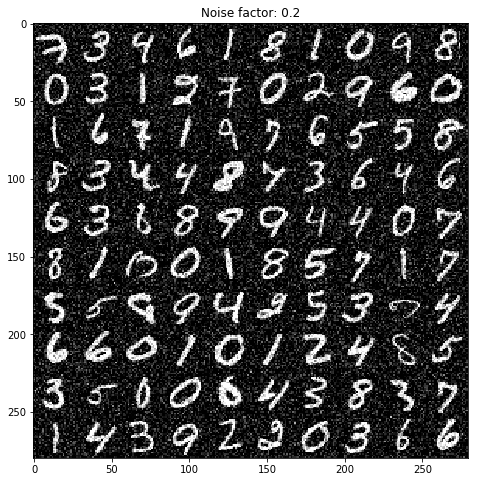

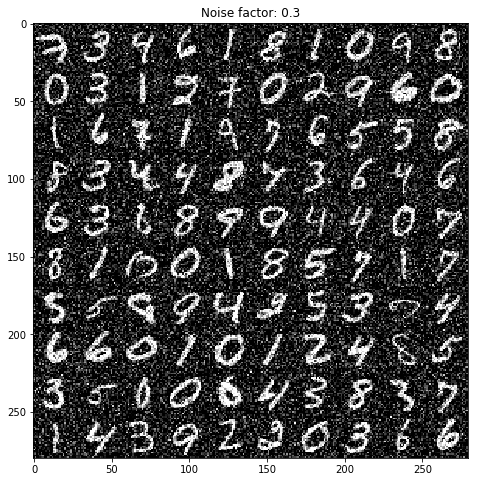

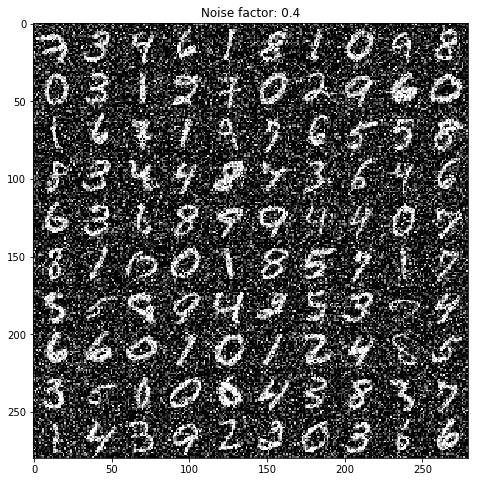

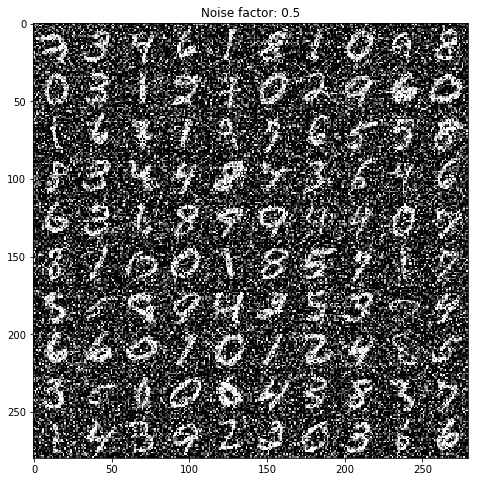

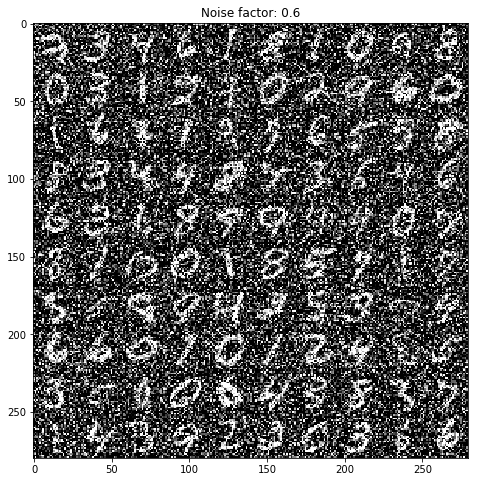

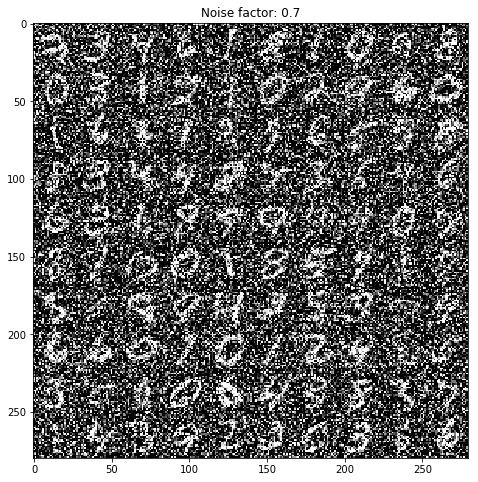

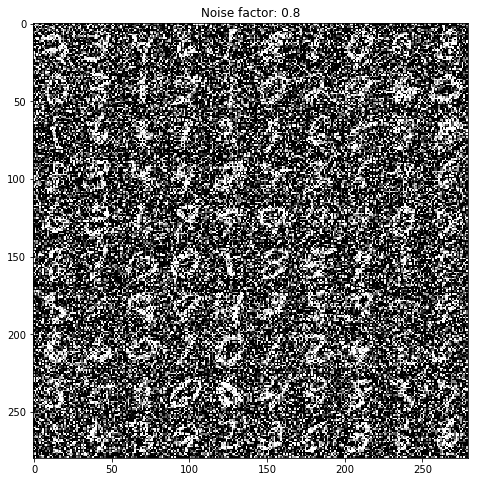

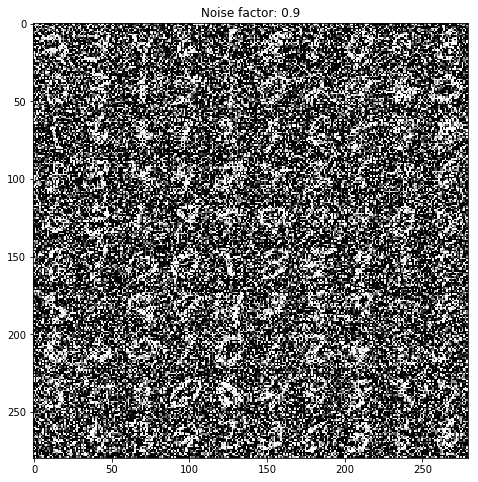

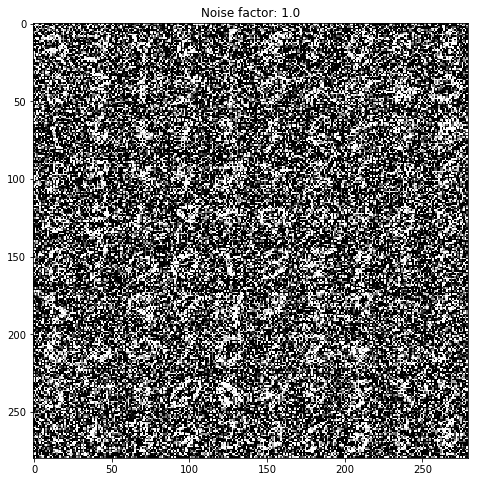

In [4]:
noise_factors = np.arange(0,1.1,0.1)
for noise_factor in noise_factors:
    np.random.seed(595)
    x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
    x_train_noisy = np.clip(x_train_noisy, 0., 1.)

    h = w = 28
    n = np.sqrt(100).astype(np.int32)
    I_generated = np.empty((h*n, w*n))
    for i in range(n):
        for j in range(n):
            I_generated[i*h:(i+1)*h, j*w:(j+1)*w] = x_train_noisy[i*n+j, :].reshape(28, 28)

    plt.figure(figsize=(8, 8))
    plt.imshow(I_generated, cmap='gray')
    plt.title("Noise factor: "+str(noise_factor))
    plt.show()

### VAE loss

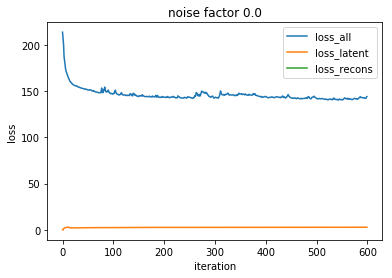

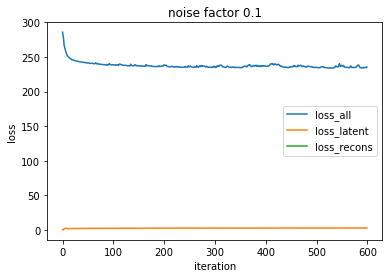

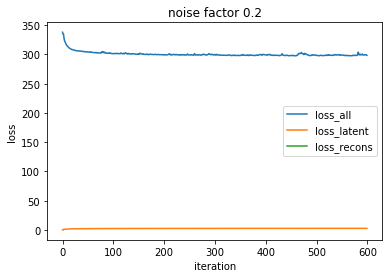

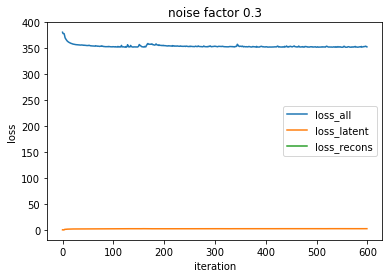

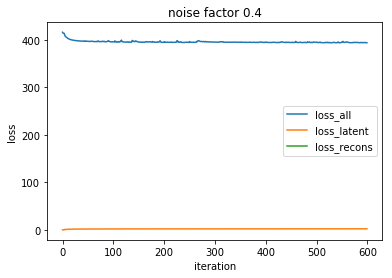

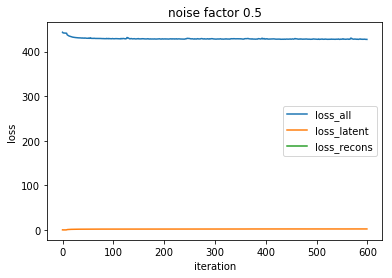

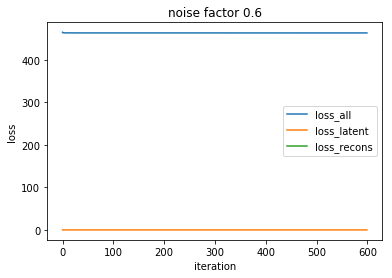

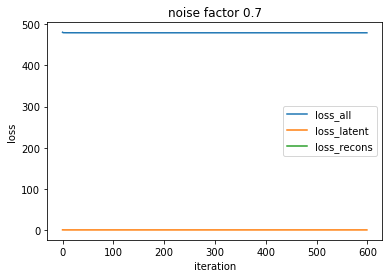

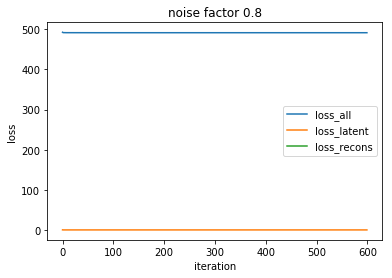

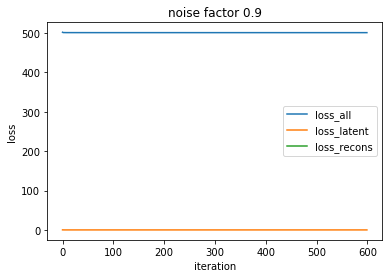

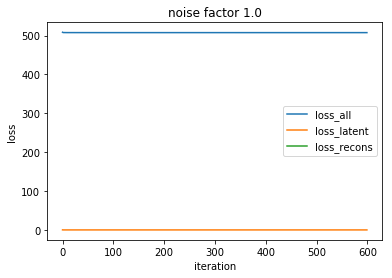

In [5]:
for n in noise_factors:
    path_all = "BasicAutoencoder/vae/"+str(n)+"/loss_all.npy"
    path_latent = "BasicAutoencoder/vae/"+str(n)+"/loss_latent.npy"
    path_recons = "BasicAutoencoder/vae/"+str(n)+"/loss_recons.npy"
    loss_all = np.load(path_all)
    loss_latent = np.load(path_latent)
    loss_recons = np.load(path_recons)
    plt.plot(loss_all, label="loss_all")
    plt.plot(loss_latent, label="loss_latent")
    plt.plot(loss_recons, label="loss_recons")
    plt.legend()
    plt.xlabel("iteration")
    plt.ylabel("loss")
    plt.title("noise factor "+str(n))
    plt.show()

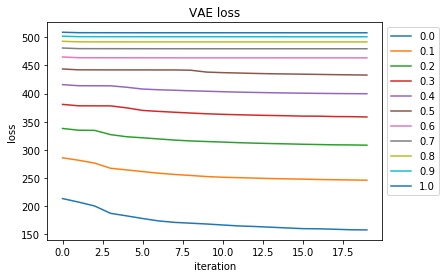

In [6]:
for n in noise_factors:
    path_all = "BasicAutoencoder/vae/"+str(n)+"/loss_all.npy"
    loss_all = np.load(path_all)[:20]
    plt.plot(loss_all, label=n)
plt.legend(bbox_to_anchor=(1, 1))
plt.title("VAE loss")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

### RVAE loss

In [7]:
losses = {}
for n in noise_factors:
    tmp = {}
    for l in lambdas:
        path = "rvae/lambda_"+str(l)+"/noise_"+str(n)+"/*_all.npy"
        file_list = glob.glob(path)
        list.sort(file_list, key=lambda x: int(x.split('/')[-1].split('loss')[-1].split('_')[0]))
        loss = []
        for f in file_list:
            loss.append(np.load(f))
        tmp[l] = np.array(loss).reshape(30*20)
    losses[n] = tmp


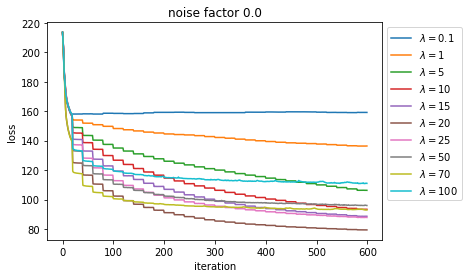

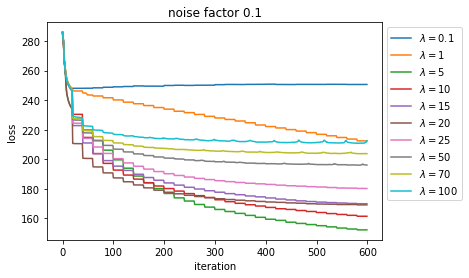

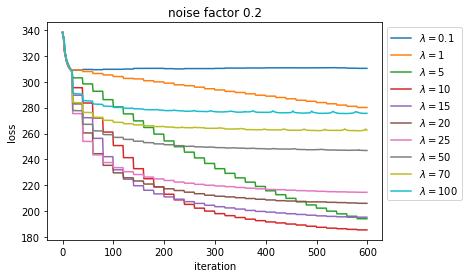

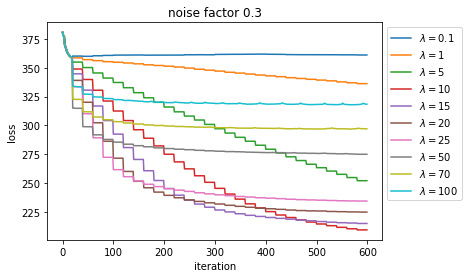

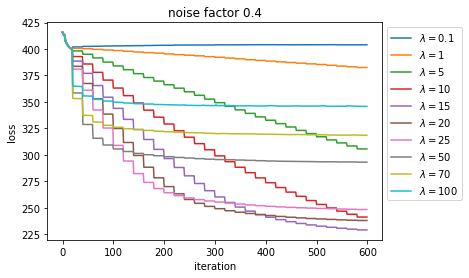

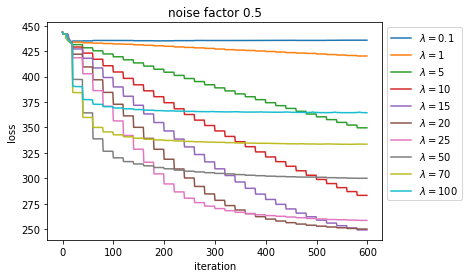

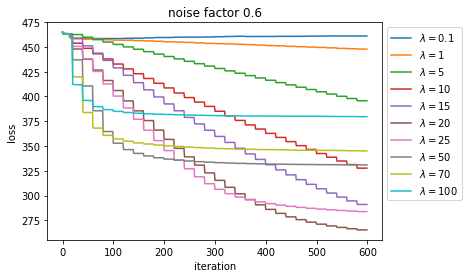

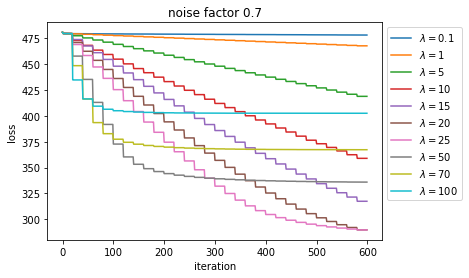

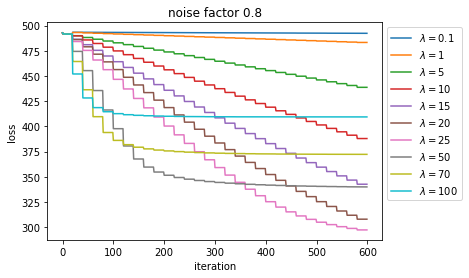

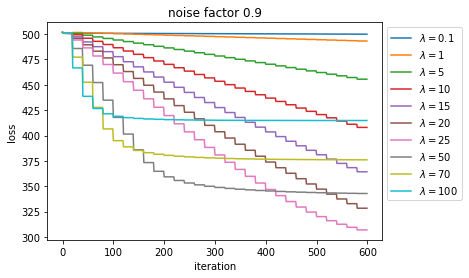

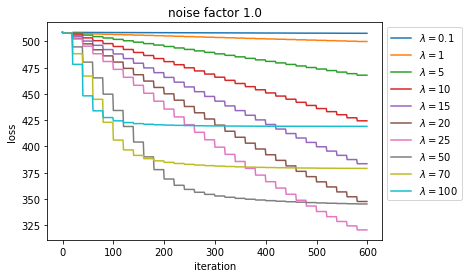

In [8]:
for n in noise_factors:
    for l in lambdas:
        plt.plot(losses[n][l],label=r'$\lambda = $'+str(l))

    plt.legend(bbox_to_anchor=(1, 1))
    plt.xlabel("iteration")
    plt.ylabel("loss")
    plt.title("noise factor "+ str(n))
    plt.show()

### FID heatmap

In [10]:
fid_scores = np.load("fid_scores.npy")
ax = sns.heatmap(fid_scores, linewidth=0.5)
plt.xlabel("noise factor")
plt.ylabel("lambda")
plt.yticks(lambdas)
plt.xticks(noise_factors)
plt.show()